In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import json
import seaborn as sns

## PROBING

In [59]:
with open(f'C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/predictions/predictions_corr.json', 'r', encoding='utf-8') as f:
    all_results = json.load(f)

In [4]:
data = pd.DataFrame.from_dict(all_results)

In [5]:
real_values = pd.read_csv("C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/probing_data/probing_test.csv")

In [6]:
real_values.head()

,id,sent,category,n_tokens,char_per_tok,upos_dist_DET,upos_dist_ADV,upos_dist_PUNCT,upos_dist_NUM,upos_dist_PRON,...,avg_max_depth,dep_dist_obj,dep_dist_nsubj,subj_pre,subj_post,n_prepositional_chains,avg_prepositional_chain_len,avg_subordinate_chain_len,subordinate_proposition_dist,avg_verb_edges
0,vit_VIT-1574,E anche Catanzaro ha le sue difficoltà.,1,8,4.571429,25.000000,12.500000,12.500000,0.0,0.000000,...,2,12.500000,12.500000,100.0,0.0,0,0.0,0.0,0.0,3.0
1,vit_VIT-418,"Per motivi evidenti, aveva detto qualche ora p...",1,31,4.821429,16.129032,6.451613,9.677419,0.0,0.000000,...,5,0.000000,6.451613,50.0,50.0,2,1.0,1.0,50.0,1.5
2,vit_VIT-5338,Il ritmo di lavoro è blando;,1,7,3.666667,14.285714,0.000000,14.285714,0.0,0.000000,...,3,0.000000,14.285714,100.0,0.0,1,1.0,0.0,0.0,0.0
3,postwita_5065,"Il presidente del Consiglio, Mario Monti, è ap...",2,24,5.700000,16.666667,4.166667,16.666667,0.0,0.000000,...,3,0.000000,4.166667,100.0,0.0,1,1.0,0.0,0.0,6.0
4,partut_it_partut-ud-1400,Ma nei corridoi del congresso degli Stati Unit...,3,18,4.625000,22.222222,0.000000,11.111111,0.0,5.555556,...,4,5.555556,5.555556,100.0,0.0,1,2.0,0.0,0.0,5.0


In [7]:
# def compute_correlation(row, df):
#     feature = row['ling_feature']
#     x = row["preds"]
#     y = df[feature].tolist()
#     res = stats.spearmanr(x, y).correlation
#     return res

# data["corr"] = data.apply(compute_correlation, axis=1, args=[real_values])

In [8]:
data

,model,step,ling_feature,layer,preds,corr
0,Anti-ReadIt,2,n_tokens,1,"[14.2617378235, 26.5588474274, 17.3904933929, ...",0.929963
1,Anti-ReadIt,2,n_tokens,2,"[14.1514997482, 27.2879371643, 15.549747467, 2...",0.931429
2,Anti-ReadIt,2,n_tokens,3,"[11.9438457489, 27.3566741943, 15.1185798645, ...",0.931339
3,Anti-ReadIt,2,n_tokens,4,"[13.2122097015, 26.7883872986, 17.9085960388, ...",0.931725
4,Anti-ReadIt,2,n_tokens,5,"[14.4300756454, 27.6109771729, 16.7157745361, ...",0.932231
...,...,...,...,...,...,...
9563,Random4,15449,avg_verb_edges,4,"[2.4546205997, 3.6466932297, 1.2308399677, 2.3...",0.498114
9564,Random4,15449,avg_verb_edges,5,"[2.4626469612, 3.6047618389, 1.1625754833, 2.5...",0.498546
9565,Random4,15449,avg_verb_edges,6,"[2.3499064445, 3.6110093594, 0.8349220753, 2.7...",0.499374
9566,Random4,15449,avg_verb_edges,7,"[2.7340738773, 3.5273244381, 0.7409112453, 2.6...",0.498637


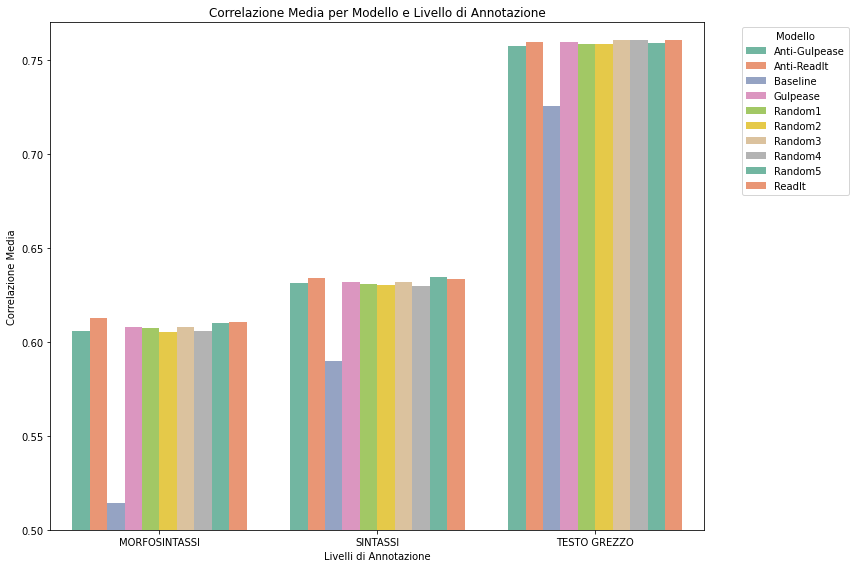

In [10]:
annotazione_mapping = {
    'n_tokens': 'TESTO GREZZO',
    'char_per_tok': 'TESTO GREZZO',
    'upos_dist_DET': 'MORFOSINTASSI',
    'upos_dist_ADV': 'MORFOSINTASSI',
    'upos_dist_PUNCT': 'MORFOSINTASSI',
    'upos_dist_NUM': 'MORFOSINTASSI',
    'upos_dist_PRON': 'MORFOSINTASSI',
    'upos_dist_ADP': 'MORFOSINTASSI',
    'upos_dist_PROPN': 'MORFOSINTASSI',
    'upos_dist_ADJ': 'MORFOSINTASSI',
    'upos_dist_VERB': 'MORFOSINTASSI',
    'upos_dist_NOUN': 'MORFOSINTASSI',
    'upos_dist_CCONJ': 'MORFOSINTASSI',
    'upos_dist_AUX': 'MORFOSINTASSI',
    'dep_dist_obj': 'SINTASSI',
    'dep_dist_nsubj': 'SINTASSI',
    'avg_links_len': 'SINTASSI',
    'max_links_len': 'SINTASSI',
    'avg_max_depth': 'SINTASSI',
    'subj_pre': 'SINTASSI',
    'subj_post': 'SINTASSI',
    'n_prepositional_chains': 'SINTASSI',
    'avg_prepositional_chain_len': 'SINTASSI',
    'avg_verb_edges': 'SINTASSI',
    'avg_subordinate_chain_len': 'SINTASSI',
    'subordinate_proposition_dist': 'SINTASSI'
}

feature_to_category = {
    'n_tokens': 'RawText',
    'char_per_tok': 'RawText',
    'upos_dist_DET': 'POS',
    'upos_dist_ADV': 'POS',
    'upos_dist_PUNCT': 'POS',
    'upos_dist_NUM': 'POS',
    'upos_dist_PRON': 'POS',
    'upos_dist_ADP': 'POS',
    'upos_dist_PROPN': 'POS',
    'upos_dist_ADJ': 'POS',
    'upos_dist_VERB': 'POS',
    'upos_dist_NOUN': 'POS',
    'upos_dist_CCONJ': 'POS',
    'upos_dist_AUX': 'POS',
    'avg_verb_edges': 'VerbPredicate',
    'avg_links_len': 'TreeStructure',
    'max_links_len': 'TreeStructure',
    'avg_max_depth': 'TreeStructure',
    'n_prepositional_chains': 'TreeStructure',
    'avg_prepositional_chain_len': 'TreeStructure',
    'subj_pre': 'Order',
    'subj_post': 'Order',
    'dep_dist_nsubj': 'SyntacticDep',
    'dep_dist_obj': 'SyntacticDep',
    'avg_subordinate_chain_len': 'Subord',
    'subordinate_proposition_dist': 'Subord'
    # Aggiungi tutte le altre associazioni necessarie
}

# Aggiungi il livello di annotazione al dataframe
data['annotazione'] = data['ling_feature'].map(annotazione_mapping)
data["categoria"] = data['ling_feature'].map(feature_to_category)

# Raggruppa per modello e annotazione, calcola la correlazione media
grouped_data = data.groupby(['model', 'annotazione'])['corr'].mean().reset_index()

# Creazione del grafico a barre raggruppato usando Seaborn
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set2", len(data['model'].unique()))  # Usa una palette di colori distinti
sns.barplot(x='annotazione', y='corr', hue='model', data=grouped_data, palette=palette)

# Aggiustamenti al grafico
plt.xlabel('Livelli di Annotazione')
plt.ylabel('Correlazione Media')
plt.title('Correlazione Media per Modello e Livello di Annotazione')
plt.xticks(rotation=0)  # Rotazione delle etichette se necessario
plt.ylim(0.5, 0.77)  # Restrizione dell'intervallo dell'asse y per evidenziare meglio le variazioni
plt.legend(title='Modello', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


plt.tight_layout()
plt.show()

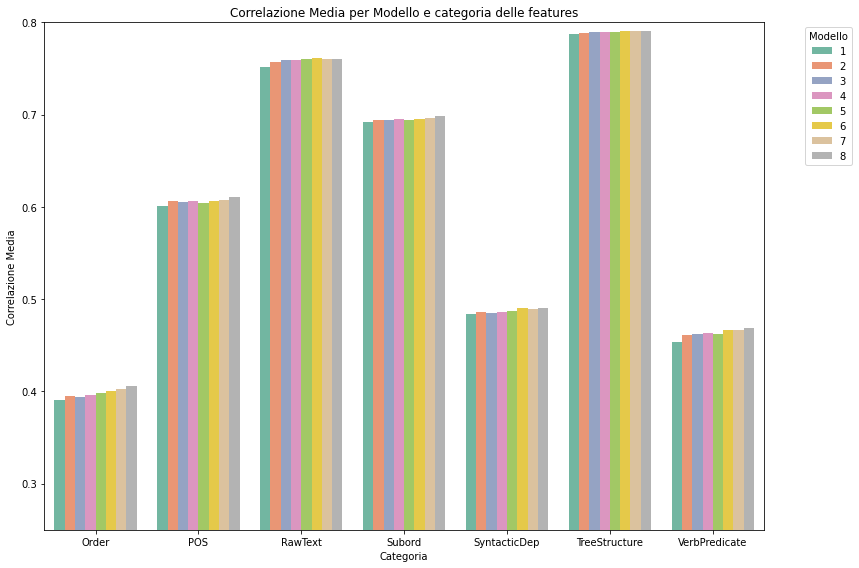

In [10]:
grouped_data = data.groupby(['layer', 'categoria'])['corr'].mean().reset_index()
# Creazione del grafico a barre raggruppato usando Seaborn
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set2", len(data['model'].unique()))  # Usa una palette di colori distinti
sns.barplot(x='categoria', y='corr', hue='layer', data=grouped_data, palette=palette)

# Aggiustamenti al grafico
plt.xlabel('Categoria')
plt.ylabel('Correlazione Media')
plt.title('Correlazione Media per Modello e categoria delle features')
plt.xticks(rotation=0)  # Rotazione delle etichette se necessario
plt.ylim(0.25, 0.8)  # Restrizione dell'intervallo dell'asse y per evidenziare meglio le variazioni
plt.legend(title='Modello', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


plt.tight_layout()
plt.show()

In [11]:
data.head()

,model,step,ling_feature,layer,preds,corr,annotazione,categoria
0,Anti-ReadIt,2,n_tokens,1,"[14.2617378235, 26.5588474274, 17.3904933929, ...",0.929963,TESTO GREZZO,RawText
1,Anti-ReadIt,2,n_tokens,2,"[14.1514997482, 27.2879371643, 15.549747467, 2...",0.931429,TESTO GREZZO,RawText
2,Anti-ReadIt,2,n_tokens,3,"[11.9438457489, 27.3566741943, 15.1185798645, ...",0.931339,TESTO GREZZO,RawText
3,Anti-ReadIt,2,n_tokens,4,"[13.2122097015, 26.7883872986, 17.9085960388, ...",0.931725,TESTO GREZZO,RawText
4,Anti-ReadIt,2,n_tokens,5,"[14.4300756454, 27.6109771729, 16.7157745361, ...",0.932231,TESTO GREZZO,RawText


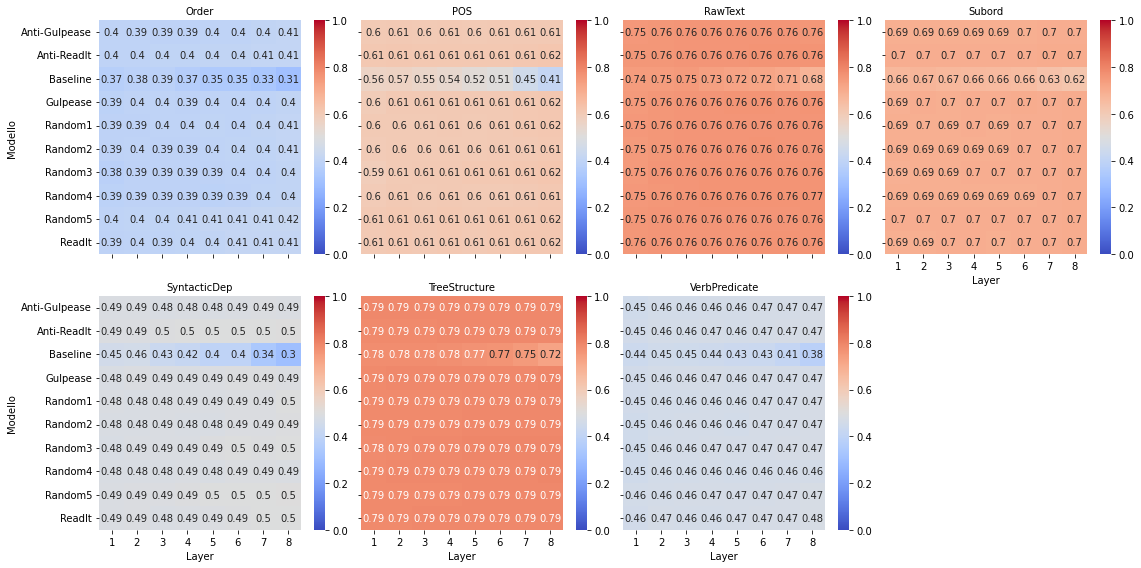

In [12]:
df_grouped = data.groupby(['model', 'layer', 'categoria'])['corr'].mean().reset_index()

# Usa FacetGrid per creare una griglia di heatmap per ogni feature linguistica
g = sns.FacetGrid(df_grouped, col="categoria", col_wrap=4, height=4)

# Mappiamo i dati su una heatmap. Si usa pivot per strutturare correttamente i dati
g.map_dataframe(lambda data, color: sns.heatmap(
    data.pivot("model", "layer", "corr"),
    annot=True, cmap="coolwarm", cbar=True, vmin=0, vmax=1))

g.set_axis_labels("Layer", "Modello")
g.set_titles(col_template="{col_name}")
plt.show()

In [11]:
categorie = data["categoria"].unique()
print(categorie)

['RawText' 'POS' 'TreeStructure' 'SyntacticDep' 'Order' 'Subord'
 'VerbPredicate']


In [15]:
data["step"].unique()

array([    2,    32,   512,  8192, 15449,     0], dtype=int64)

In [17]:
sns.set_theme(rc={'figure.figsize':(10,10)})
df_last = data[data["step"]==15449]
for categoria in categorie: 
    df_grouped = df_last[df_last["categoria"]==categoria].groupby(['model', 'layer'])['corr'].mean().reset_index()
    plt.figure(figsize=(12, 8))
    plot = sns.lineplot(x='layer', y='corr', hue='model', data=df_grouped[df_grouped['model'] != 'Baseline'], marker='o')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=5, fontsize=15, frameon=False)
    plt.xlabel("Layer", fontsize = 20)
    plt.ylabel("Spearman Correlation", fontsize = 20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    fig = plot.get_figure()
    fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/spazio/corr-layer-{categoria}")
    plt.clf()


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [19]:
pos_features = data[data["categoria"]=="POS"]["ling_feature"].unique()
print(pos_features)


['upos_dist_DET' 'upos_dist_ADV' 'upos_dist_PUNCT' 'upos_dist_NUM'
 'upos_dist_PRON' 'upos_dist_ADP' 'upos_dist_PROPN' 'upos_dist_ADJ'
 'upos_dist_VERB' 'upos_dist_NOUN' 'upos_dist_CCONJ' 'upos_dist_AUX']


In [20]:


df_grouped

,model,layer,corr
0,Anti-Gulpease,1,0.486042
1,Anti-Gulpease,2,0.493100
2,Anti-Gulpease,3,0.495032
3,Anti-Gulpease,4,0.499067
4,Anti-Gulpease,5,0.500341
...,...,...,...
67,ReadIt,4,0.508902
68,ReadIt,5,0.517436
69,ReadIt,6,0.522736
70,ReadIt,7,0.525569


In [23]:
sns.set_theme(rc={'figure.figsize':(10,10)})
for pos in pos_features:
    df_grouped = data[data["model"]!= "Baseline"]
    #df_grouped['model'] = df_grouped['model'].apply(lambda x: 'Random' if 'Random' in x else x)
    #df_grouped = df_grouped[df_grouped["step"]==15449]
    df_grouped = df_grouped[df_grouped["ling_feature"]==pos].groupby(['model', 'layer', 'ling_feature'])['corr'].mean().reset_index()
    plt.figure(figsize=(12, 8))
    plot = sns.lineplot(x='layer', y='corr', data=df_grouped, marker='o', ci=False)
    plot.set(xlabel=f'Layer', ylabel=f'Correlation')
    plt.xlabel("Layer", fontsize=20)
    plt.ylabel("Spearman Correlation", fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=5, fontsize=16, frameon=False)
    #plot.legend(title="Part of Speech", loc='center left', bbox_to_anchor=(1, 0.5))  # Legenda a destra
    #plt.subplots_adjust(right=0.8)  # Sposta il limite destro per far spazio alla legenda
    fig = plot.get_figure()
    fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/spazio/spazio_{pos}_all", bbox_inches="tight")
    plt.clf()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [21]:
df_grouped['model'] = data['model'].apply(lambda x: 'Random' if 'Random' in x else x)
for pos in pos_features:
    df_grouped = df_grouped[df_grouped["model"]!="Baseline"]
    df_grouped = df_grouped[df_grouped["ling_feature"]==pos].groupby(['model', 'layer', 'ling_feature'])['corr'].mean().reset_index()
    plt.figure(figsize=(12, 8))
    plot = sns.lineplot(x='layer', y='corr', hue="model", data=df_grouped, marker='o')
    plot.set(xlabel=f'Layer', ylabel=f'Correlation')
    plt.subplots_adjust(right=0.8)  # Sposta il limite destro per far spazio alla legenda
    fig = plot.get_figure()
    fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/spazio/pos_models/{pos}_models", bbox_inches="tight")
    plt.clf()
   

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [16]:
df_grouped["model"].unique()

array(['Anti-Gulpease', 'Anti-ReadIt', 'Baseline', 'Gulpease', 'Random1',
       'Random2', 'Random3', 'Random4', 'Random5', 'ReadIt'], dtype=object)

In [21]:
df_grouped = data[data["layer"]==8]
df_grouped["layer"].unique()

array([8], dtype=int64)

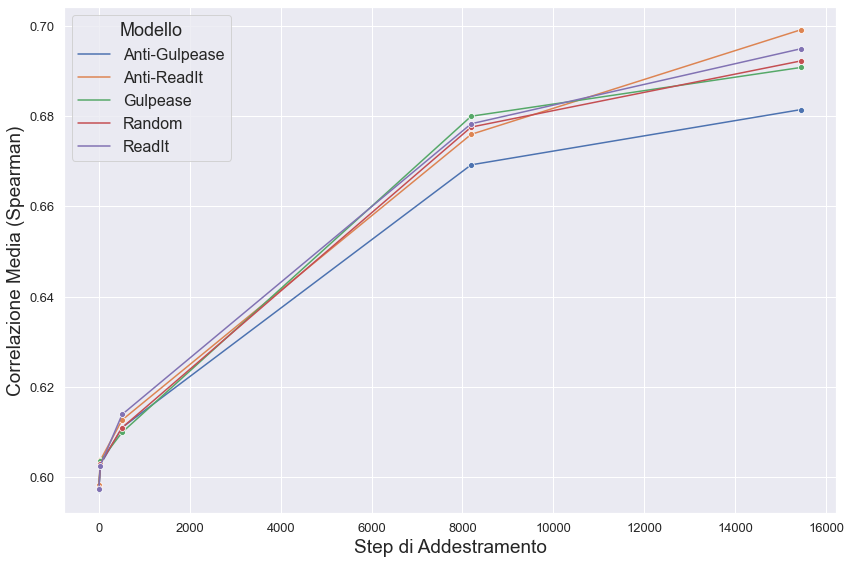

In [56]:

df_grouped['model'] = df_grouped['model'].apply(lambda x: 'Random' if 'Random' in x else x)
df_grouped = df_grouped.groupby(['model', 'step'])['corr'].mean().reset_index()
sns.set_theme(rc={'figure.figsize':(11.7,10)})


# Creazione del grafico a linee per visualizzare le correlazioni medie dei modelli nei vari step
plt.figure(figsize=(12, 8))
sns.lineplot(x='step', y='corr', hue='model', data=df_grouped[df_grouped['model'] != 'Baseline'], marker='o')

# Aggiustamenti al grafico
baseline_data = df_grouped[df_grouped['model'] == 'Baseline']
average_corr = baseline_data['corr'].mean()  
# plt.axhline(y=average_corr, color='grey', linestyle='--', linewidth=2, label='Baseline')
#plt.title('Correlazioni medie dei modelli nei primi step', fontsize=20)
plt.xlabel('Step di Addestramento', fontsize=19)
plt.ylabel('Correlazione Media (Spearman)', fontsize=19)
plt.legend(title='Modello', loc='best', fontsize=16, title_fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.grid(True)
# plt.xlim(-50, 600)
# plt.ylim(0.595, 0.62)
plt.tight_layout()
plt.show()

In [57]:
print(average_corr)

0.49161755785


In [9]:
data["ling_feature"].unique()

array(['n_tokens', 'char_per_tok', 'upos_dist_DET', 'upos_dist_ADV',
       'upos_dist_PUNCT', 'upos_dist_NUM', 'upos_dist_PRON',
       'upos_dist_ADP', 'upos_dist_PROPN', 'upos_dist_ADJ',
       'upos_dist_VERB', 'upos_dist_NOUN', 'upos_dist_CCONJ',
       'upos_dist_AUX', 'avg_links_len', 'max_links_len', 'avg_max_depth',
       'dep_dist_obj', 'dep_dist_nsubj', 'subj_pre', 'subj_post',
       'n_prepositional_chains', 'avg_prepositional_chain_len',
       'avg_subordinate_chain_len', 'subordinate_proposition_dist',
       'avg_verb_edges'], dtype=object)

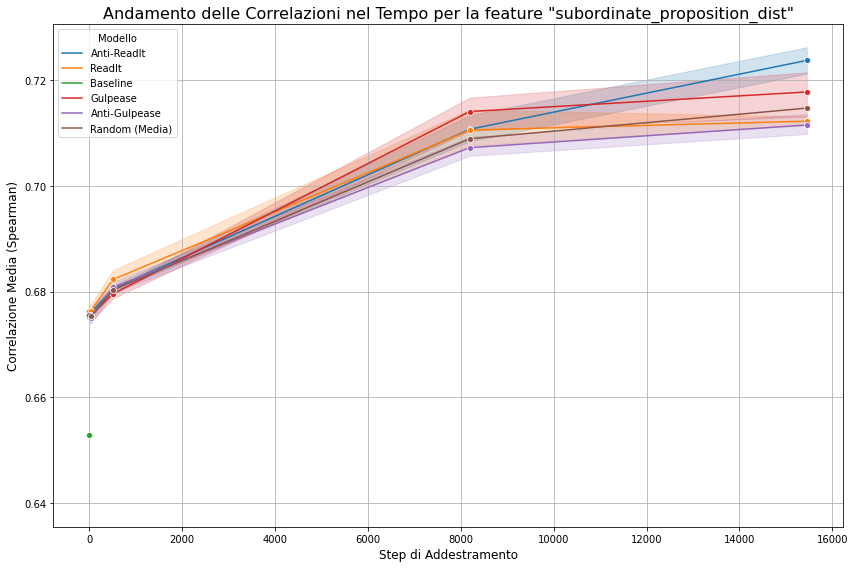

In [24]:
sel_feature = "subordinate_proposition_dist"
df_filtered = data[data['ling_feature'] == sel_feature]

# Calcola la media delle correlazioni per i modelli random
random_models = df_filtered[df_filtered['model'].str.contains('Random')]
random_mean = random_models.groupby(['step'])['corr'].mean().reset_index()
random_mean['model'] = 'Random (Media)'

# Filtra i modelli non-random
non_random_models = df_filtered[~df_filtered['model'].str.contains('Random')]

# Combina i dati dei modelli non-random con la media dei random
df_combined = pd.concat([non_random_models, random_mean])

# Creazione del grafico a linee
plt.figure(figsize=(12, 8))
sns.lineplot(x='step', y='corr', hue='model', data=df_combined, marker='o')

# Aggiustamenti al grafico
plt.title(f'Andamento delle Correlazioni nel Tempo per la feature "{sel_feature}"', fontsize=16)
plt.xlabel('Step di Addestramento', fontsize=12)
plt.ylabel('Correlazione Media (Spearman)', fontsize=12)
plt.legend(title='Modello', loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
grouped_data

,model,annotazione,corr
0,Anti-Gulpease,MORFOSINTASSI,0.605530
1,Anti-Gulpease,SINTASSI,0.631071
2,Anti-Gulpease,TESTO GREZZO,0.757495
3,Anti-ReadIt,MORFOSINTASSI,0.612560
4,Anti-ReadIt,SINTASSI,0.633798
5,Anti-ReadIt,TESTO GREZZO,0.759402
6,Baseline,MORFOSINTASSI,0.514032
7,Baseline,SINTASSI,0.589783
8,Baseline,TESTO GREZZO,0.725424
9,Gulpease,MORFOSINTASSI,0.607930


In [8]:
data["step"].unique()

array([    2,    32,   512,  8192, 15449,     0], dtype=int64)

In [8]:
filtered_df = data[ (data['step'] != 0)]
all_features =filtered_df["ling_feature"].unique()
#grouped_df = filtered_df.groupby(['model', 'step']).agg({'corr': 'mean'}).reset_index()

In [9]:
data["model"].unique()

array(['Anti-ReadIt', 'ReadIt', 'Random3', 'Random5', 'Baseline',
       'Gulpease', 'Anti-Gulpease', 'Random1', 'Random2', 'Random4'],
      dtype=object)

In [10]:
data[data["model"]=="Baseline"]

,model,step,ling_feature,layer,preds,corr,annotazione,categoria
4160,Baseline,0,n_tokens,1,"[9.3236713409, 21.3845024109, 4.8495140076, 22...",0.941685,TESTO GREZZO,RawText
4161,Baseline,0,n_tokens,2,"[10.962392807, 23.0891017914, 7.7781953812, 24...",0.945974,TESTO GREZZO,RawText
4162,Baseline,0,n_tokens,3,"[6.2028808594, 19.0692062378, 4.3291797638, 19...",0.947400,TESTO GREZZO,RawText
4163,Baseline,0,n_tokens,4,"[5.3505096436, 23.5349273682, 5.5952129364, 23...",0.943611,TESTO GREZZO,RawText
4164,Baseline,0,n_tokens,5,"[8.2340583801, 24.8221855164, 10.161441803, 20...",0.939437,TESTO GREZZO,RawText
...,...,...,...,...,...,...,...,...
4363,Baseline,0,avg_verb_edges,4,"[2.8457300663, 3.2104251385, 1.1681096554, 2.3...",0.443612,SINTASSI,VerbPredicate
4364,Baseline,0,avg_verb_edges,5,"[2.7159171104, 3.1476712227, 1.1512212753, 2.0...",0.434832,SINTASSI,VerbPredicate
4365,Baseline,0,avg_verb_edges,6,"[3.1815719604, 3.1751627922, 1.0648701191, 2.2...",0.433208,SINTASSI,VerbPredicate
4366,Baseline,0,avg_verb_edges,7,"[1.9589049816, 2.754326582, 1.4480955601, 2.31...",0.410758,SINTASSI,VerbPredicate


In [11]:
media_corr = data.groupby(['model'])['corr'].mean()


In [12]:
media_corr_sorted = media_corr.sort_values(ascending=False)

In [27]:
randoms = [0.632632, 0.630771, 0.629942, 0.628772, 0.628740]
randoms_mean = np.mean(randoms)

In [28]:
randoms_mean

0.6301713999999999

In [ ]:
print(media_corr_sorted)

model
Anti-ReadIt      0.633658
Random5          0.632632
ReadIt           0.632616
Random3          0.630771
Gulpease         0.630682
Random1          0.629942
Anti-Gulpease    0.629008
Random4          0.628772
Random2          0.628740
Baseline         0.565255
Name: corr, dtype: float64


In [ ]:
print(media_corr_sorted)

model
Anti-ReadIt      0.633658
Random5          0.632632
ReadIt           0.632616
Random3          0.630771
Gulpease         0.630682
Random1          0.629942
Anti-Gulpease    0.629008
Random4          0.628772
Random2          0.628740
Baseline         0.565255
Name: corr, dtype: float64


In [ ]:
print(media_corr_sorted)

model
Anti-ReadIt      0.633658
Random5          0.632632
ReadIt           0.632616
Random3          0.630771
Gulpease         0.630682
Random1          0.629942
Anti-Gulpease    0.629008
Random4          0.628772
Random2          0.628740
Baseline         0.565255
Name: corr, dtype: float64


In [ ]:
print(media_corr_sorted)

model
Anti-ReadIt      0.633658
Random5          0.632632
ReadIt           0.632616
Random3          0.630771
Gulpease         0.630682
Random1          0.629942
Anti-Gulpease    0.629008
Random4          0.628772
Random2          0.628740
Baseline         0.565255
Name: corr, dtype: float64


In [26]:
print(media_corr_sorted)

model
Anti-ReadIt      0.633658
Random5          0.632632
ReadIt           0.632616
Random3          0.630771
Gulpease         0.630682
Random1          0.629942
Anti-Gulpease    0.629008
Random4          0.628772
Random2          0.628740
Baseline         0.565255
Name: corr, dtype: float64


In [ ]:
print(media_corr_sorted)

model
Anti-ReadIt      0.633658
Random5          0.632632
ReadIt           0.632616
Random3          0.630771
Gulpease         0.630682
Random1          0.629942
Anti-Gulpease    0.629008
Random4          0.628772
Random2          0.628740
Baseline         0.565255
Name: corr, dtype: float64


In [29]:
all_features[0]

'n_tokens'

In [13]:
all_features

array(['n_tokens', 'char_per_tok', 'upos_dist_DET', 'upos_dist_ADV',
       'upos_dist_PUNCT', 'upos_dist_NUM', 'upos_dist_PRON',
       'upos_dist_ADP', 'upos_dist_PROPN', 'upos_dist_ADJ',
       'upos_dist_VERB', 'upos_dist_NOUN', 'upos_dist_CCONJ',
       'upos_dist_AUX', 'avg_links_len', 'max_links_len', 'avg_max_depth',
       'dep_dist_obj', 'dep_dist_nsubj', 'subj_pre', 'subj_post',
       'n_prepositional_chains', 'avg_prepositional_chain_len',
       'avg_subordinate_chain_len', 'subordinate_proposition_dist',
       'avg_verb_edges'], dtype=object)

In [17]:
filtered_df

,model,step,ling_feature,layer,preds,corr,annotazione,categoria


In [18]:
filtered_df = data[data["layer"]==8]
filtered_df

,model,step,ling_feature,layer,preds,corr,annotazione,categoria
7,Anti-ReadIt,2,n_tokens,8,"[14.4033374786, 29.4192523956, 11.7669906616, ...",0.933388,TESTO GREZZO,RawText
15,Anti-ReadIt,2,char_per_tok,8,"[4.6439027786, 4.7296237946, 4.8726744652, 5.7...",0.469342,TESTO GREZZO,RawText
23,Anti-ReadIt,2,upos_dist_DET,8,"[20.6519241333, 10.3793306351, 12.4136819839, ...",0.733064,MORFOSINTASSI,POS
31,Anti-ReadIt,2,upos_dist_ADV,8,"[9.6116962433, 8.1524143219, 5.0510458946, 1.2...",0.487406,MORFOSINTASSI,POS
39,Anti-ReadIt,2,upos_dist_PUNCT,8,"[11.8426399231, 14.2073669434, 6.6567630768, 1...",0.810484,MORFOSINTASSI,POS
...,...,...,...,...,...,...,...,...
9535,Random4,15449,n_prepositional_chains,8,"[-0.450345397, 1.1909102201, 1.3454140425, 1.2...",0.794534,SINTASSI,TreeStructure
9543,Random4,15449,avg_prepositional_chain_len,8,"[0.0481338501, 0.7719969749, 0.6624885798, 1.0...",0.749710,SINTASSI,TreeStructure
9551,Random4,15449,avg_subordinate_chain_len,8,"[0.1367077827, 0.7952861786, 0.3309471607, 0.4...",0.736451,SINTASSI,Subord
9559,Random4,15449,subordinate_proposition_dist,8,"[1.564365387, 41.5217437744, 16.5145149231, 29...",0.720668,SINTASSI,Subord


In [23]:
filtered_df

,model,step,ling_feature,layer,preds,corr,annotazione,categoria


In [25]:
filtered_df = data[data["layer"]==8]
all_features =data["ling_feature"].unique()

In [60]:
filtered_df

,model,step,ling_feature,layer,preds,corr,annotazione,categoria
7,Anti-ReadIt,2,n_tokens,8,"[14.4033374786, 29.4192523956, 11.7669906616, ...",0.933388,TESTO GREZZO,RawText
15,Anti-ReadIt,2,char_per_tok,8,"[4.6439027786, 4.7296237946, 4.8726744652, 5.7...",0.469342,TESTO GREZZO,RawText
23,Anti-ReadIt,2,upos_dist_DET,8,"[20.6519241333, 10.3793306351, 12.4136819839, ...",0.733064,MORFOSINTASSI,POS
31,Anti-ReadIt,2,upos_dist_ADV,8,"[9.6116962433, 8.1524143219, 5.0510458946, 1.2...",0.487406,MORFOSINTASSI,POS
39,Anti-ReadIt,2,upos_dist_PUNCT,8,"[11.8426399231, 14.2073669434, 6.6567630768, 1...",0.810484,MORFOSINTASSI,POS
...,...,...,...,...,...,...,...,...
9535,Random4,15449,n_prepositional_chains,8,"[-0.450345397, 1.1909102201, 1.3454140425, 1.2...",0.794534,SINTASSI,TreeStructure
9543,Random4,15449,avg_prepositional_chain_len,8,"[0.0481338501, 0.7719969749, 0.6624885798, 1.0...",0.749710,SINTASSI,TreeStructure
9551,Random4,15449,avg_subordinate_chain_len,8,"[0.1367077827, 0.7952861786, 0.3309471607, 0.4...",0.736451,SINTASSI,Subord
9559,Random4,15449,subordinate_proposition_dist,8,"[1.564365387, 41.5217437744, 16.5145149231, 29...",0.720668,SINTASSI,Subord


In [27]:
sns.set_theme(rc={'figure.figsize':(12,10)})
for feature in all_features:
    filtered_df = data[data["ling_feature"]==feature]
    filtered_df = filtered_df[filtered_df["layer"]==8]
    sns.lineplot(data=filtered_df[filtered_df["model"]!="Baseline"], x='step', y='corr', hue="model", marker='o', ci=None)
    # baseline_data = filtered_df[filtered_df['model'] == 'Baseline']
    # average_corr = baseline_data['corr'].mean()  
    # plt.axhline(y=average_corr, color='grey', linestyle='--', linewidth=2, label='Baseline')
    plt.xlabel('Training steps', fontsize=21)
    plt.ylabel('Spearman correlation', fontsize=21)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=5, fontsize=15, frameon=False)
    file_path = (F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/tempo/corr-checkpoint-feature-LASTLAYER/hor-legend/corr-checkpoint-{feature}.png")
    plt.savefig(file_path, bbox_inches='tight') 
    plt.clf()


<Figure size 864x720 with 0 Axes>

In [37]:
filtered_df = filtered_df[filtered_df["ling_feature"]=="upos_dist_VERB"]
filtered_df

,model,step,ling_feature,layer,preds,corr,annotazione,categoria
87,Anti-ReadIt,2,upos_dist_VERB,8,"[13.8639411926, 12.4632282257, 8.1858673096, 4...",0.479722,MORFOSINTASSI,POS
295,Anti-ReadIt,32,upos_dist_VERB,8,"[14.2049713135, 11.5277175903, 8.2748184204, 3...",0.487418,MORFOSINTASSI,POS
503,Anti-ReadIt,512,upos_dist_VERB,8,"[11.1635074615, 10.8046627045, 6.6415576935, 4...",0.515754,MORFOSINTASSI,POS
711,Anti-ReadIt,8192,upos_dist_VERB,8,"[9.5184936523, 10.3409748077, 11.1151027679, 0...",0.620425,MORFOSINTASSI,POS
919,Anti-ReadIt,15449,upos_dist_VERB,8,"[13.4885320663, 11.0195407867, 7.8142399788, 4...",0.686683,MORFOSINTASSI,POS
1127,ReadIt,2,upos_dist_VERB,8,"[12.5979499817, 12.3406772614, 8.2761497498, 4...",0.479292,MORFOSINTASSI,POS
1335,ReadIt,32,upos_dist_VERB,8,"[13.4037675858, 11.1018543243, 8.4921588898, 3...",0.487860,MORFOSINTASSI,POS
1543,ReadIt,512,upos_dist_VERB,8,"[11.3456192017, 10.0392990112, 6.2817020416, 4...",0.519521,MORFOSINTASSI,POS
1751,ReadIt,8192,upos_dist_VERB,8,"[9.9793319702, 10.7765426636, 9.740234375, 3.9...",0.632602,MORFOSINTASSI,POS
1959,ReadIt,15449,upos_dist_VERB,8,"[9.2429294586, 11.8337535858, 8.148856163, 3.1...",0.674924,MORFOSINTASSI,POS


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


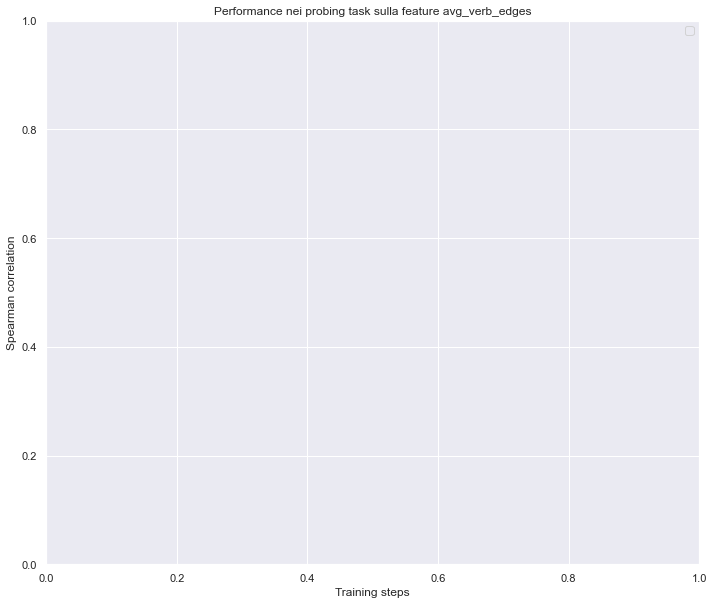

In [29]:
filtered_df = filtered_df[filtered_df["ling_feature"]=="n_tokens"]
sns.lineplot(data=filtered_df[filtered_df["model"]!="Baseline"], x='step', y='corr', hue="model", marker='o', ci=None)
# baseline_data = filtered_df[filtered_df['model'] == 'Baseline']
# average_corr = baseline_data['corr'].mean()  
# plt.axhline(y=average_corr, color='grey', linestyle='--', linewidth=2, label='Baseline')
plt.xlabel('Training steps')
plt.ylabel('Spearman correlation')
plt.title(f"Performance nei probing task sulla feature {feature}")
plt.legend()
plt.show()
file_path = (F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/tempo/corr-checkpoint-feature-LASTLAYER/corr-checkpoint-{feature}-2.png")
# plt.savefig(file_path)
# plt.clf()


In [29]:
filtered_df.head()

,model,step,ling_feature,layer,preds,corr,annotazione,categoria
0,Anti-ReadIt,2,n_tokens,1,"[14.2617378235, 26.5588474274, 17.3904933929, ...",0.929963,TESTO GREZZO,RawText
1,Anti-ReadIt,2,n_tokens,2,"[14.1514997482, 27.2879371643, 15.549747467, 2...",0.931429,TESTO GREZZO,RawText
2,Anti-ReadIt,2,n_tokens,3,"[11.9438457489, 27.3566741943, 15.1185798645, ...",0.931339,TESTO GREZZO,RawText
3,Anti-ReadIt,2,n_tokens,4,"[13.2122097015, 26.7883872986, 17.9085960388, ...",0.931725,TESTO GREZZO,RawText
4,Anti-ReadIt,2,n_tokens,5,"[14.4300756454, 27.6109771729, 16.7157745361, ...",0.932231,TESTO GREZZO,RawText


In [26]:
filtered_df = data[(data['step'] != 0)]
all_models =filtered_df["model"].unique()
all_features = filtered_df["ling_feature"].unique()
all_categories = filtered_df["categoria"].unique

In [31]:

sns.set_theme(rc={'figure.figsize':(14,12)})
palette1 = sns.color_palette("tab20", 20)
palette2 = sns.color_palette("Set3", 6)
combined_palette = palette1 + palette2

for model in all_models:
    filtered_df = data[ (data['model'] == model)]
    plot = sns.lineplot(data=filtered_df, x='step', y='corr', hue="categoria", marker='o', ci=None)
    plot.set(xlabel=f'Training steps', ylabel=f'Correlation')
    plot.set_title(f"Performance nei probing task del modello {model}")
    plot.legend(title="Categoria", loc='center left', bbox_to_anchor=(1, 0.5))  # Legenda a destra
    plt.subplots_adjust(right=0.8)  # Sposta il limite destro per far spazio alla legenda
    fig = plot.get_figure()
    fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/tempo/corr-checkpoint-{model}")
    plt.clf()


<Figure size 1008x864 with 0 Axes>

In [ ]:
for category in all_categories:
    plot = sns.lineplot(data=filtered_df, x='step', y='corr', hue=category, marker='o', ci=None, palette=combined_palette)
    plot.set(xlabel=f'Training steps', ylabel=f'Correlation')
    plot.set_title(f"Performance nei probing task del modello {model}")
    plot.legend(title="Model", loc='center left', bbox_to_anchor=(1, 0.5))  # Legenda a destra
    plt.subplots_adjust(right=0.8)  # Sposta il limite destro per far spazio alla legenda
    fig = plot.get_figure()
    fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/tempo/corr-checkpoint-{model}")
    plt.clf()


In [16]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})


plot = sns.scatterplot(x, y, x="N tokens reali", y="N tokens predetti")
plot.set(xlabel='n tokens reali', ylabel='n tokens predetti')
plot.set_title(f"CORRELAZIONE\n{res}")
fig = plot.get_figure()
fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/models/{training_id}/probing_results/prova.png")


NameError: name 'x' is not defined

In [28]:
checkpoints = data["step"].unique()
checkpoints

array([    2,    32,   512,  8192, 15449], dtype=int64)

In [29]:
features = data["ling_feature"].unique()
features

array(['n_tokens', 'char_per_tok', 'upos_dist_DET', 'upos_dist_ADV',
       'upos_dist_PUNCT', 'upos_dist_NUM', 'upos_dist_PRON',
       'upos_dist_ADP', 'upos_dist_PROPN', 'upos_dist_ADJ',
       'upos_dist_VERB', 'upos_dist_NOUN', 'upos_dist_CCONJ',
       'upos_dist_AUX', 'avg_links_len', 'max_links_len', 'avg_max_depth',
       'dep_dist_obj', 'dep_dist_nsubj', 'subj_pre', 'subj_post',
       'n_prepositional_chains', 'avg_prepositional_chain_len',
       'avg_subordinate_chain_len', 'subordinate_proposition_dist',
       'avg_verb_edges'], dtype=object)

In [30]:
layers = data["layer"].unique()
layers

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [31]:
data

,model,step,ling_feature,layer,preds
0,ANTI_CURRICULUM,2,n_tokens,1,"[14.2617378235, 26.5588474274, 17.3904933929, ..."
1,ANTI_CURRICULUM,2,n_tokens,2,"[14.1514997482, 27.2879371643, 15.549747467, 2..."
2,ANTI_CURRICULUM,2,n_tokens,3,"[11.9438457489, 27.3566741943, 15.1185798645, ..."
3,ANTI_CURRICULUM,2,n_tokens,4,"[13.2122097015, 26.7883872986, 17.9085960388, ..."
4,ANTI_CURRICULUM,2,n_tokens,5,"[14.4300756454, 27.6109771729, 16.7157745361, ..."
...,...,...,...,...,...
1035,ANTI_CURRICULUM,15449,avg_verb_edges,4,"[2.4327993393, 3.550909996, 1.192373395, 2.102..."
1036,ANTI_CURRICULUM,15449,avg_verb_edges,5,"[2.542453289, 2.9933393002, 1.327378273, 2.378..."
1037,ANTI_CURRICULUM,15449,avg_verb_edges,6,"[2.3473558426, 2.9784145355, 1.5979086161, 2.1..."
1038,ANTI_CURRICULUM,15449,avg_verb_edges,7,"[2.2342386246, 3.14443326, 1.5708684921, 2.171..."


## PERPLEXITY

In [3]:
sns.set_style("darkgrid")


In [4]:
frasi10 = pd.read_csv("C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/perplexity/ricalcolati/all_ppl/ppls_l10.csv")
frasi15 = pd.read_csv("C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/perplexity/ricalcolati/all_ppl/ppls_l15.csv")
frasi20 = pd.read_csv("C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/perplexity/ricalcolati/all_ppl/ppls_l20.csv")
frasi25 = pd.read_csv("C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/perplexity/ricalcolati/all_ppl/ppls_l25.csv")
frasi30 = pd.read_csv("C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/perplexity/ricalcolati/all_ppl/ppls_l30.csv")

In [5]:
frasi15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          100 non-null    int64  
 1   text                  100 non-null    object 
 2   num_words             100 non-null    int64  
 3   dataset               100 non-null    object 
 4   pp_gulp_c2            100 non-null    float64
 5   pp_gulp_c32           100 non-null    float64
 6   pp_gulp_c512          100 non-null    float64
 7   pp_gulp_c8192         100 non-null    float64
 8   pp_gulp_c15449        100 non-null    float64
 9   pp_antigulp_c2        100 non-null    float64
 10  pp_antigulp_c32       100 non-null    float64
 11  pp_antigulp_c512      100 non-null    float64
 12  pp_antigulp_c8192     100 non-null    float64
 13  pp_antigulp_c15449    100 non-null    float64
 14  pp_random5_c2         100 non-null    float64
 15  pp_random5_c32        10

In [6]:
frasi15[["text", "pp_random37_c15449", "pp_readit_c15449", "pp_gulp_c15449"]].head(30)
#.sort_values("pp_random21_c15449")
    

,text,pp_random37_c15449,pp_readit_c15449,pp_gulp_c15449
0,"Due anni dopo, il ""Fronte Popolare"" vinse le e...",0.418642,0.431053,0.343360
1,Rta presidente del Museo del Comune di Tossici...,0.173786,0.202150,0.176995
2,guidando i Ravens con 95 tackle malgrado l'ave...,0.165855,0.156365,0.154595
3,In breve tempo si fece un nome come avvocato d...,0.102950,0.084383,0.112207
4,Ließem è un comune di 76 abitanti della Renani...,0.302025,0.307755,0.255000
5,Meda fu scelto come suo sostituto fino alla su...,0.312979,0.300245,0.230402
6,Nell'ambito del processo penale l'ufficiale gi...,0.242652,0.261415,0.218111
7,Konken è un comune di 758 abitanti della Renan...,0.319052,0.314093,0.250145
8,L'attività di Rizner influenzò l'opera di sua ...,0.218602,0.219800,0.204839
9,"La Lista rossa IUCN classifica ""Nepenthes mulu...",0.144680,0.141708,0.148261


In [7]:
frasi_totale = pd.concat([frasi10, frasi15, frasi20, frasi25, frasi30], ignore_index=True)


In [8]:
frasi_totale["num_words"].unique()

array([10, 15, 20, 25, 30], dtype=int64)

In [9]:
frasi_totale["dataset"].unique()

array(['wiki', 'treebank'], dtype=object)

In [10]:
frasi_totale.head()

,Unnamed: 0.1,text,num_words,dataset,pp_gulp_c2,pp_gulp_c32,pp_gulp_c512,pp_gulp_c8192,pp_gulp_c15449,pp_antigulp_c2,...,pp_random21_c2,pp_random21_c32,pp_random21_c512,pp_random21_c8192,pp_random21_c15449,pp_random37_c2,pp_random37_c32,pp_random37_c512,pp_random37_c8192,pp_random37_c15449
0,0,Ma l'assassino è stato più veloce di lei.,10,wiki,0.000064,0.000399,0.074747,0.320007,0.339214,0.000065,...,0.000062,0.000427,0.082885,0.334055,0.342141,0.000065,0.000413,0.074851,0.312396,0.362874
1,1,"Duca di Marino, II Duca di Miraglia, VIII",10,wiki,0.000076,0.001669,0.006879,0.059059,0.062741,0.000085,...,0.000083,0.001382,0.004638,0.047391,0.077207,0.000089,0.001954,0.009392,0.055464,0.082640
2,2,Il singolo vende oltre di copie solo negli Usa.,10,wiki,0.000053,0.000302,0.079173,0.146777,0.146458,0.000068,...,0.000058,0.000329,0.090362,0.155258,0.159268,0.000067,0.000364,0.084553,0.158911,0.166263
3,3,I nuovi successi continentali (1924-1928).,10,wiki,0.000034,0.000199,0.064485,0.275995,0.305674,0.000033,...,0.000038,0.000252,0.074242,0.287079,0.299804,0.000035,0.000227,0.063443,0.284489,0.328087
4,4,"Intanto, Alaric e Jenna iniziano ad uscire ins...",10,wiki,0.000049,0.000814,0.004991,0.032791,0.040868,0.000042,...,0.000048,0.000711,0.004439,0.022138,0.043696,0.000043,0.000921,0.006401,0.031996,0.055702


In [11]:
ppl_last = pd.DataFrame()
ppl_last["text"] = frasi_totale["text"]
ppl_last["Gulpease"] = frasi_totale["pp_gulp_c15449"]
ppl_last["Readit"] = frasi_totale["pp_readit_c15449"]
ppl_last["AntiGulpease"] = frasi_totale["pp_antigulp_c15449"]
ppl_last["AntiReadit"] = frasi_totale["pp_antireadit_c15449"]
ppl_last["Random1"] = frasi_totale["pp_random5_c15449"]
ppl_last["Random2"] = frasi_totale["pp_random18_c15449"]
ppl_last["Random3"] = frasi_totale["pp_random21_c15449"]
ppl_last["Random4"] = frasi_totale["pp_random29_c15449"]
ppl_last["Random5"] = frasi_totale["pp_random37_c15449"]
ppl_last['RandomGroup'] = ppl_last[['Random1', 'Random2', 'Random3', 'Random4', 'Random5']].mean(axis=1)



In [12]:
ppl_middle = pd.DataFrame()
ppl_middle["text"] = frasi_totale["text"]
ppl_middle["Gulpease"] = frasi_totale["pp_gulp_c8192"]
ppl_middle["Readit"] = frasi_totale["pp_readit_c8192"]
ppl_middle["AntiGulpease"] = frasi_totale["pp_antigulp_c8192"]
ppl_middle["AntiReadit"] = frasi_totale["pp_antireadit_c8192"]
ppl_middle["Random1"] = frasi_totale["pp_random5_c8192"]
ppl_middle["Random2"] = frasi_totale["pp_random18_c8192"]
ppl_middle["Random3"] = frasi_totale["pp_random21_c8192"]
ppl_middle["Random4"] = frasi_totale["pp_random29_c8192"]
ppl_middle["Random5"] = frasi_totale["pp_random37_c8192"]
ppl_middle["dataset"] = frasi_totale["dataset"]
ppl_middle["num_words"] = frasi_totale["num_words"]
ppl_middle['RandomGroup'] = ppl_middle[['Random1', 'Random2', 'Random3', 'Random4', 'Random5']].mean(axis=1)


In [13]:
ppl_middle['RandomGroup'] = ppl_middle[['Random1', 'Random2', 'Random3', 'Random4', 'Random5']].mean(axis=1)


In [14]:
ppl_last["dataset"] = frasi_totale["dataset"]

In [15]:
ppl_last["num_words"] = frasi_totale["num_words"]

In [16]:
ppl_last

,text,Gulpease,Readit,AntiGulpease,AntiReadit,Random1,Random2,Random3,Random4,Random5,RandomGroup,dataset,num_words
0,Ma l'assassino è stato più veloce di lei.,0.339214,0.349395,0.342826,0.328982,0.364473,0.345861,0.342141,0.349633,0.362874,0.352996,wiki,10
1,"Duca di Marino, II Duca di Miraglia, VIII",0.062741,0.118871,0.075270,0.134106,0.117176,0.050994,0.077207,0.053777,0.082640,0.076359,wiki,10
2,Il singolo vende oltre di copie solo negli Usa.,0.146458,0.154799,0.156309,0.147070,0.142284,0.151818,0.159268,0.154275,0.166263,0.154782,wiki,10
3,I nuovi successi continentali (1924-1928).,0.305674,0.345518,0.307261,0.337054,0.372245,0.282861,0.299804,0.295385,0.328087,0.315677,wiki,10
4,"Intanto, Alaric e Jenna iniziano ad uscire ins...",0.040868,0.058406,0.040484,0.033126,0.045708,0.037908,0.043696,0.025979,0.055702,0.041799,wiki,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,"Non è escluso, dunque, che la vicenda si chiud...",0.141774,0.157575,0.142185,0.193329,0.154653,0.148425,0.141181,0.142965,0.168087,0.151062,treebank,30
498,"La Bbc Company, l'agenzia che organizza le dat...",0.109656,0.140138,0.119211,0.137153,0.129443,0.115367,0.116579,0.107353,0.130420,0.119832,treebank,30
499,Obiettivi conseguiti grazie anche alla complet...,0.132045,0.155116,0.136412,0.158660,0.143133,0.123810,0.137910,0.142817,0.147258,0.138986,treebank,30
500,Ma il cinismo declinò al progredire della sua ...,0.115435,0.167027,0.124418,0.178834,0.157326,0.120987,0.135745,0.121603,0.155942,0.138320,treebank,30


In [17]:
ppl_last.head()

,text,Gulpease,Readit,AntiGulpease,AntiReadit,Random1,Random2,Random3,Random4,Random5,RandomGroup,dataset,num_words
0,Ma l'assassino è stato più veloce di lei.,0.339214,0.349395,0.342826,0.328982,0.364473,0.345861,0.342141,0.349633,0.362874,0.352996,wiki,10
1,"Duca di Marino, II Duca di Miraglia, VIII",0.062741,0.118871,0.075270,0.134106,0.117176,0.050994,0.077207,0.053777,0.082640,0.076359,wiki,10
2,Il singolo vende oltre di copie solo negli Usa.,0.146458,0.154799,0.156309,0.147070,0.142284,0.151818,0.159268,0.154275,0.166263,0.154782,wiki,10
3,I nuovi successi continentali (1924-1928).,0.305674,0.345518,0.307261,0.337054,0.372245,0.282861,0.299804,0.295385,0.328087,0.315677,wiki,10
4,"Intanto, Alaric e Jenna iniziano ad uscire ins...",0.040868,0.058406,0.040484,0.033126,0.045708,0.037908,0.043696,0.025979,0.055702,0.041799,wiki,10


### GRAFICI PPL LENGHT

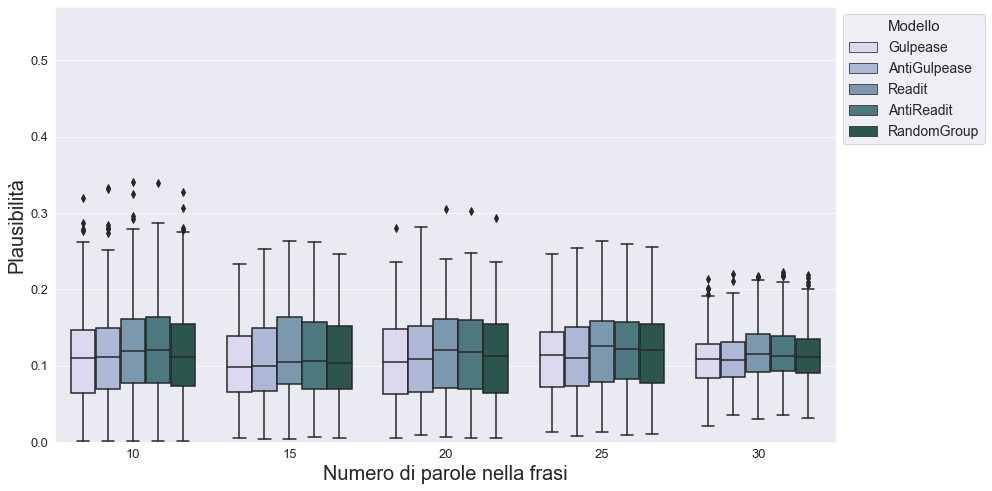

In [50]:
    # Per visualizzare la distribuzione dei valori per ogni modello rispetto a 'num_words'
plt.figure(figsize=(14, 8), facecolor='white')
my_palette = sns.cubehelix_palette(start=2)
# Usare un melt per trasformare il dataframe in un formato lungo
df_melt = pd.melt(ppl_middle, id_vars=['num_words'], value_vars=['Gulpease', 'AntiGulpease', 'Readit', 'AntiReadit', 'RandomGroup'])

# Creare un boxplot per ogni modello rispetto al numero di parole
sns.boxplot(x='num_words', y='value', hue='variable', data=df_melt, palette=my_palette)
plt.ylim([0.00, 0.57])
# Aggiustamenti del grafico
#plt.title('Distribuzione della plausibilità delle frasi rispetto alla loro lunghezza per ogni modello', fontsize = 20)
plt.xlabel('Numero di parole nella frasi', fontsize = 20)
plt.ylabel('Plausibilità', fontsize=20)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(title='Modello', bbox_to_anchor=(1, 1), loc='upper left', fontsize=14, title_fontsize=15)


plt.show()

In [19]:
df_grouped = ppl_last.groupby('num_words').mean()


In [20]:
df_grouped

,Gulpease,Readit,AntiGulpease,AntiReadit,Random1,Random2,Random3,Random4,Random5,RandomGroup
num_words,,,,,,,,,,
10,0.136216,0.156689,0.140674,0.168162,0.151696,0.136815,0.144186,0.139329,0.158727,0.146151
15,0.128384,0.154441,0.131700,0.168152,0.142540,0.130595,0.135587,0.128512,0.147926,0.137032
20,0.131627,0.157234,0.134801,0.168593,0.145325,0.132863,0.138524,0.132899,0.148540,0.139630
25,0.132457,0.160566,0.137890,0.176469,0.149587,0.135471,0.139824,0.134513,0.155302,0.142939
30,0.134129,0.165023,0.138381,0.180934,0.151546,0.136185,0.142600,0.135674,0.159583,0.145118


In [21]:
ppl_last["Random5"].mean()

0.1540345257428529

In [22]:
df_grouped.transpose().round(4)

num_words,10,15,20,25,30
Gulpease,0.1362,0.1284,0.1316,0.1325,0.1341
Readit,0.1567,0.1544,0.1572,0.1606,0.1650
AntiGulpease,0.1407,0.1317,0.1348,0.1379,0.1384
AntiReadit,0.1682,0.1682,0.1686,0.1765,0.1809
Random1,0.1517,0.1425,0.1453,0.1496,0.1515
Random2,0.1368,0.1306,0.1329,0.1355,0.1362
Random3,0.1442,0.1356,0.1385,0.1398,0.1426
Random4,0.1393,0.1285,0.1329,0.1345,0.1357
Random5,0.1587,0.1479,0.1485,0.1553,0.1596
RandomGroup,0.1462,0.1370,0.1396,0.1429,0.1451


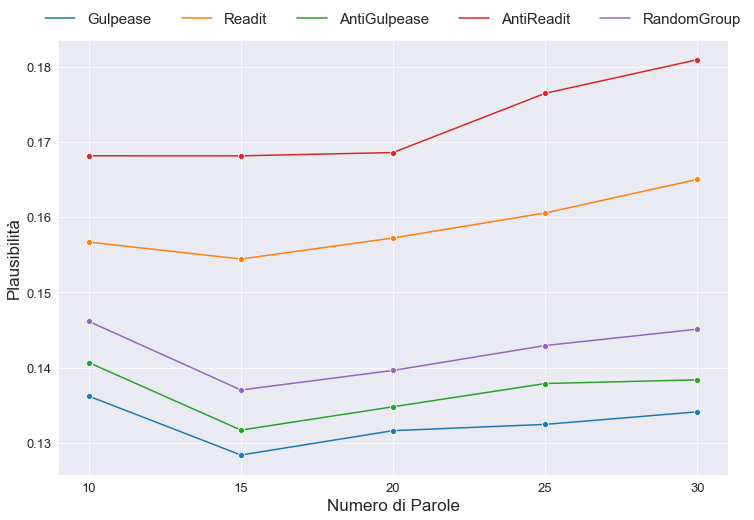

In [51]:
df_melt = pd.melt(ppl_last, id_vars=['num_words'], value_vars=['Gulpease', 'Readit', 'AntiGulpease', 'AntiReadit', 'RandomGroup'])

# Creiamo un lineplot con num_words come asse x e la media di perplessità come asse y
plt.figure(figsize=(12, 8))
sns.lineplot(x='num_words', y='value', hue='variable', data=df_melt, marker='o', ci=None)

# Aggiustamenti del grafico
#plt.title('Perplessità Media per Modello e Lunghezza delle Frasi', fontsize=17)
plt.xlabel('Numero di Parole', fontsize = 17)
plt.ylabel('Plausibilità', fontsize=17)
plt.xticks([10, 15, 20, 25, 30], fontsize=13)
plt.yticks(fontsize=13)  # Mostrare solo i valori specifici di num_words
plt.grid(True)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=5, fontsize=15, frameon=False)

# Mostriamo il grafico
plt.show()

### GRAFICI PPL DATASET

In [24]:
readabilty = pd.read_csv("C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/perplexity/test_readability.csv")

In [25]:
readabilty.head()

,id,text,readability
0,1,Ma l'assassino è stato più veloce di lei.,63.977520
1,2,"Duca di Marino, II Duca di Miraglia, VIII",21.548608
2,3,Il singolo vende oltre di copie solo negli Usa.,31.291058
3,4,I nuovi successi continentali (1924-1928).,99.344064
4,5,"Intanto, Alaric e Jenna iniziano ad uscire ins...",41.065191


In [26]:
df_merged = pd.merge(ppl_last, readabilty[['text', 'readability']], on='text', how='left')

# Visualizza il dataframe risultante
df_merged.head()

,text,Gulpease,Readit,AntiGulpease,AntiReadit,Random1,Random2,Random3,Random4,Random5,RandomGroup,dataset,num_words,readability
0,Ma l'assassino è stato più veloce di lei.,0.339214,0.349395,0.342826,0.328982,0.364473,0.345861,0.342141,0.349633,0.362874,0.352996,wiki,10,63.977520
1,"Duca di Marino, II Duca di Miraglia, VIII",0.062741,0.118871,0.075270,0.134106,0.117176,0.050994,0.077207,0.053777,0.082640,0.076359,wiki,10,21.548608
2,Il singolo vende oltre di copie solo negli Usa.,0.146458,0.154799,0.156309,0.147070,0.142284,0.151818,0.159268,0.154275,0.166263,0.154782,wiki,10,31.291058
3,I nuovi successi continentali (1924-1928).,0.305674,0.345518,0.307261,0.337054,0.372245,0.282861,0.299804,0.295385,0.328087,0.315677,wiki,10,99.344064
4,"Intanto, Alaric e Jenna iniziano ad uscire ins...",0.040868,0.058406,0.040484,0.033126,0.045708,0.037908,0.043696,0.025979,0.055702,0.041799,wiki,10,41.065191


In [27]:
df_merged["Random1"].corr(df_merged["readability"])

-0.19645823389641176

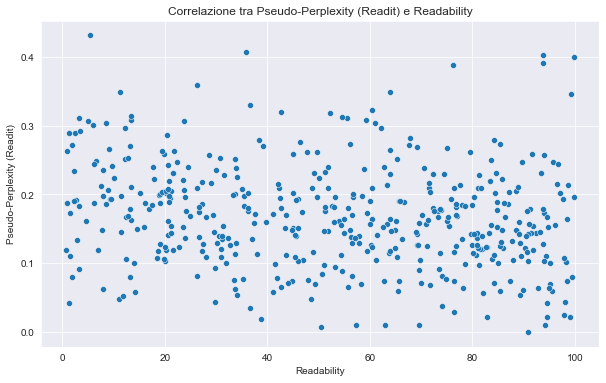

In [28]:
# Creare uno scatterplot con Seaborn per analizzare la correlazione tra 'Readit' (pseudo-perplexity) e 'readability'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='readability', y='Readit', data=df_merged)

# Aggiustamenti del grafico
plt.title('Correlazione tra Pseudo-Perplexity (Readit) e Readability')
plt.xlabel('Readability')
plt.ylabel('Pseudo-Perplexity (Readit)')
plt.grid(True)

# Visualizza il grafico
plt.show()

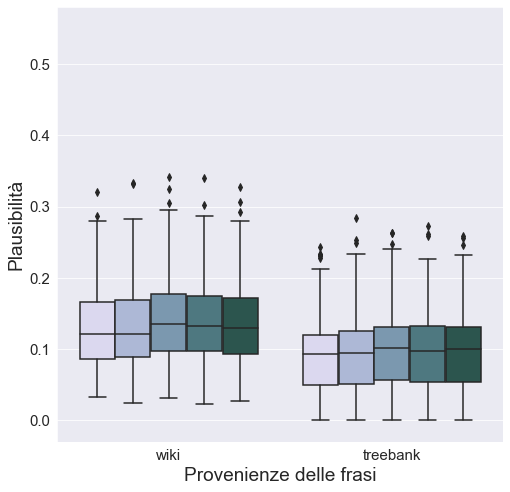

In [70]:
# Creare un boxplot con legenda (che verrà rimossa successivamente)
plt.figure(figsize=(8, 8), facecolor='white')
my_palette = sns.cubehelix_palette(start=2)

# Usare un melt per trasformare il dataframe in un formato lungo
df_melt = pd.melt(ppl_middle, id_vars=['dataset'], value_vars=['Gulpease', 'AntiGulpease', 'Readit', 'AntiReadit', 'RandomGroup'])

# Creare il boxplot
ax = sns.boxplot(x='dataset', y='value', hue='variable', data=df_melt, palette=my_palette)

# Rimuovere la legenda dal grafico
ax.legend_.remove()

# Aggiustamenti del grafico
plt.xlabel('Provenienze delle frasi', fontsize = 19)
plt.ylabel('Plausibilità', fontsize=19)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([-0.03, 0.58])
# Mostriamo il grafico senza la legenda
plt.show()

In [71]:
ppl_last["Gulpease"]

0      0.339214
1      0.062741
2      0.146458
3      0.305674
4      0.040868
         ...   
497    0.141774
498    0.109656
499    0.132045
500    0.115435
501    0.112012
Name: Gulpease, Length: 502, dtype: float64

<Figure size 576x576 with 0 Axes>

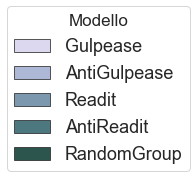

In [69]:

plt.figure(figsize=(8, 8), facecolor='white')
my_palette = sns.cubehelix_palette(start=2)

# Usare un melt per trasformare il dataframe in un formato lungo
df_melt = pd.melt(ppl_last, id_vars=['dataset'], value_vars=['Gulpease', 'AntiGulpease', 'Readit', 'AntiReadit', 'RandomGroup'])

# Creiamo un boxplot temporaneo per generare la legenda
boxplot = sns.boxplot(x='dataset', y='value', hue='variable', data=df_melt, palette=my_palette)

# Rimuoviamo il grafico
boxplot.remove()

# Creiamo una nuova figura per mostrare solo la legenda
figlegend = plt.figure(figsize=(3, 3))
legend = figlegend.legend(*boxplot.get_legend_handles_labels(), loc='center', fontsize=18, frameon=True, title='Modello', title_fontsize=17)

# Impostiamo lo sfondo bianco
legend.get_frame().set_facecolor('white')

# Nascondiamo tutti gli assi
plt.gca().set_axis_off()

# Mostriamo solo la legenda
plt.show()


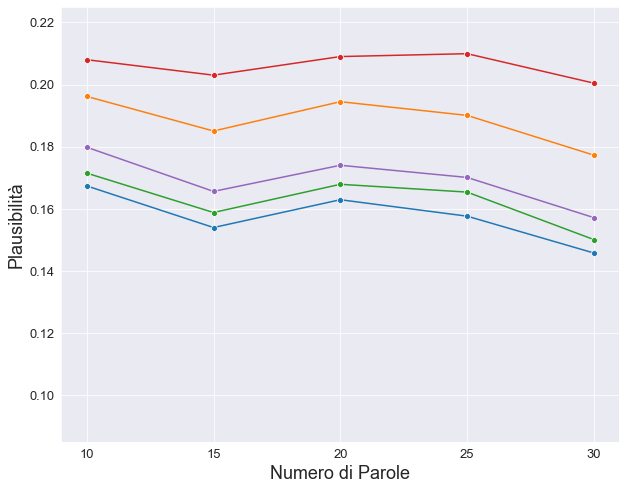

In [54]:
df_melt = pd.melt(ppl_last[ppl_last["dataset"]=="wiki"], id_vars=['num_words'], value_vars=['Gulpease', 'Readit', 'AntiGulpease', 'AntiReadit', 'RandomGroup'])

# Creiamo un lineplot con num_words come asse x e la media di perplessità come asse y
plt.figure(figsize=(10, 8))
sns.lineplot(x='num_words', y='value', hue='variable', data=df_melt, marker='o', ci=None, legend=False)

# Aggiustamenti del grafico
plt.xlabel('Numero di Parole', fontsize = 18)
plt.ylabel('Plausibilità', fontsize=18)
plt.xticks([10, 15, 20, 25, 30], fontsize=13)
plt.yticks(fontsize=13)  # Mostrare solo i valori specifici di num_words
plt.grid(True)
#plt.legend(fontsize=16)
plt.ylim(0.085,0.225)  # Restrizione dell'intervallo dell'asse y per evidenziare meglio le variazioni

# Mostriamo il grafico
plt.show()

<Figure size 432x288 with 0 Axes>

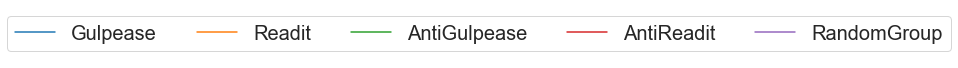

In [40]:
# Creiamo un grafico solo per ottenere la legenda
fig, ax = plt.subplots()

# Creiamo il grafico invisibile per generare la legenda
sns.lineplot(x='num_words', y='value', hue='variable', data=df_melt, marker='o', ci=None, ax=ax)

# Rimuoviamo il grafico dalla figura
ax.remove()

# Estraiamo la legenda e mostriamola in una nuova figura
figlegend = plt.figure(figsize=(1, 1))
legend = figlegend.legend(*ax.get_legend_handles_labels(), loc='center', fontsize=20, frameon=True, ncol=5)
legend.get_frame().set_facecolor('white')

# Nascondiamo tutti gli assi
plt.gca().set_axis_off()

# Mostriamo la legenda
plt.show()

In [31]:
# Creare una tabella pivot per visualizzare i modelli come colonne e dataset con num_words come righe
pivot_table = pd.pivot_table(ppl_last, 
                             index=['dataset', 'num_words'],  # Righe con dataset e num_words
                             values=['Gulpease', 'Readit', 'AntiGulpease', 'AntiReadit',  'RandomGroup'],  # Valori
                             aggfunc='mean')  # Funzione di aggregazione (media)

# Visualizzare la tabella pivot
print(pivot_table)

                    AntiGulpease  AntiReadit  Gulpease  RandomGroup    Readit
dataset  num_words                                                           
treebank 10             0.111035    0.129844  0.106248     0.113757  0.118700
         15             0.104584    0.133273  0.102787     0.108455  0.123831
         20             0.101704    0.128166  0.100323     0.105238  0.119980
         25             0.110395    0.142992  0.107278     0.115775  0.131050
         30             0.126676    0.161412  0.122487     0.133079  0.152777
wiki     10             0.171499    0.208014  0.167383     0.179840  0.196196
         15             0.158816    0.203031  0.153981     0.165609  0.185051
         20             0.167898    0.209019  0.162930     0.174023  0.194487
         25             0.165386    0.209945  0.157637     0.170104  0.190081
         30             0.150086    0.200455  0.145771     0.157156  0.177270


In [32]:
print(pivot_table)

                    AntiGulpease  AntiReadit  Gulpease  RandomGroup    Readit
dataset  num_words                                                           
treebank 10             0.111035    0.129844  0.106248     0.113757  0.118700
         15             0.104584    0.133273  0.102787     0.108455  0.123831
         20             0.101704    0.128166  0.100323     0.105238  0.119980
         25             0.110395    0.142992  0.107278     0.115775  0.131050
         30             0.126676    0.161412  0.122487     0.133079  0.152777
wiki     10             0.171499    0.208014  0.167383     0.179840  0.196196
         15             0.158816    0.203031  0.153981     0.165609  0.185051
         20             0.167898    0.209019  0.162930     0.174023  0.194487
         25             0.165386    0.209945  0.157637     0.170104  0.190081
         30             0.150086    0.200455  0.145771     0.157156  0.177270
